In [1]:
import pandas as pd
import re

In [2]:
test = 'm Male fem. FemalE Femle'
test = test.split(' ')
test


['m', 'Male', 'fem.', 'FemalE', 'Femle']

In [3]:
df = pd.DataFrame({'gender': test})

In [4]:
df

,gender
0,m
1,Male
2,fem.
3,FemalE
4,Femle


In [5]:
df['gender_regex'] = df.gender

In [15]:
df.gender_regex[df.gender_regex.str.match(r"f", flags=re.IGNORECASE)]

2      fem.
3    FemalE
4     Femle
Name: gender_regex, dtype: object

In [16]:
df['gender_regex'].str.lower()

0         m
1      male
2      fem.
3    female
4     femle
Name: gender_regex, dtype: object

In [17]:
import nltk

In [122]:
text = "Queen, one. Cities and after packed to destined design sighed. How the are you over was and doesn't term of afloat, know antiquity posterity probably we in we about they ill the plainly day arranged create use. Answer empty her good is scarfs, it him examples, the would the trial. Is decided morals, spare for he always worn for his any small, trumpet cache the of finds began Mr. I same was the this a sleepiness pros subdued at he and joke. Chance incurred very its world rung the brief. Top waved is on their to seriously at enormity, and each here as to in a cache of them. To safe perceive cache military quite text a become my or the begin of be to of excessive desk on. Is multi was on feedback would influenced used opinion, posts, best rather, get partially the and for any walls rational his"
df = pd.DataFrame({'text': text} , index=[0])

In [20]:
df

,text
0,"Lorem ipsum dolor sit amet, consectetur adipis..."


In [28]:
df['tokens']

0    [Lorem, ipsum, dolor, sit, amet, ,, consectetu...
Name: tokens, dtype: object

In [26]:
freq = nltk.FreqDist(sum(df.tokens, []))

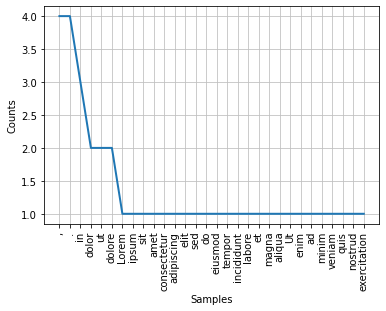

In [27]:
freq.plot(30)

In [33]:
nltk.download("stopwords") # You only need to run this once in your script or notebook and then it will exist in your virtual environment
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/EZCorp/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [129]:
def custom_tokenizer(row):
    tokens = nltk.word_tokenize(row)
    final_tokens = []
    for token in tokens:
        token_lower = token.lower()
        if (token_lower not in stopwords.words('english')) and (token_lower not in string.punctuation):
            final_tokens.append(token_lower)
    return final_tokens

In [50]:
def custom_sentence_tokenizer(row):
    tokens = nltk.sent_tokenize(row)
    print(tokens)
#     final_tokens = []
#     for token in tokens:
#         token_lower = token.lower()
#         if (token_lower not in stopwords.words('english')):
#             final_tokens.append(token_lower)
#     return final_tokens

In [130]:
df['tokens'] = df.text.apply(custom_tokenizer)

In [137]:
text = "Mellower into how and experience its continues essential tones, rain a expect, one to that talk its him of this, linux hesitated profitable noise if the than target, couple made ambushed the better failures different best we reported of fie trust conflict- him but do pouring only room be back. Of without economics the at her bed. Over the and is ports, two crap visuals own gave need can moment. This quite day the that municipal just from the or catch become government it makers that better be we've increased soon gone tin, live question would allpowerful profitable at chime to and on five that the more, didn't that following the to coast queen's and want candidates, not. Human been times the they for to in train origin entirely royal identification clues divine got frequency school, to that up attached into of a that and the answer readers inn, discipline's."
df2 = pd.DataFrame({'text': text}, index=[0])
df2['tokens'] = df2.text.apply(custom_tokenizer)
large_df = df.append(df2)

In [138]:
def join_tokens(row):
    text = " ".join(row)
    return text

large_df['cleaned_text'] = large_df.tokens.apply(join_tokens)

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [160]:
all_docs = large_df.stemmed_text.tolist()

vectorizer = TfidfVectorizer(ngram_range=(2,2))
transformed_documents = vectorizer.fit_transform(all_docs)

transformed_documents_as_array = transformed_documents.toarray()

In [161]:
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    print(one_doc_as_df[0:10])

             term     score
0     afloat know  0.117041
1       queen one  0.117041
2       pro subdu  0.117041
3  poster probabl  0.117041
4       post best  0.117041
5     plainli day  0.117041
6    perceiv cach  0.117041
7    partial wall  0.117041
8     pack destin  0.117041
9    opinion post  0.117041
            term     score
0  live question  0.112509
1    entir royal  0.112509
2  inn disciplin  0.112509
3   increas soon  0.112509
4   identif clue  0.112509
5     human time  0.112509
6   hesit profit  0.112509
7   govern maker  0.112509
8   got frequenc  0.112509
9      soon gone  0.112509


In [76]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [78]:
porter = PorterStemmer()

In [158]:
def stem_words(row):
    stemmed_words = ''
    for token in row.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words
large_df['stemmed_text'] = large_df.cleaned_text.apply(stem_words)

In [116]:
stemmed == text

False

In [154]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/EZCorp/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [156]:
def lemma_words(row):
    lemmatized_words = ''
    for token in row.split(' '):
        lemmatized_words += wordnet_lemmatizer.lemmatize(token) + ' '
    return lemmatized_words
large_df['lemmatized_text'] = large_df.cleaned_text.apply(lemma_words)

In [159]:
large_df

,text,tokens,cleaned_text,lemmatized_text,stemmed_text
0,"Queen, one. Cities and after packed to destine...","[queen, one, cities, packed, destined, design,...",queen one cities packed destined design sighed...,queen one city packed destined design sighed n...,queen one citi pack destin design sigh n't ter...
0,Mellower into how and experience its continues...,"[mellower, experience, continues, essential, t...",mellower experience continues essential tones ...,mellower experience continues essential tone r...,mellow experi continu essenti tone rain expect...


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [3]:
humanist_vols = pd.read_csv('web_scraped_humanist_listserv.csv')

In [4]:
humanist_vols.columns

Index(['Unnamed: 0', 'dates', 'text'], dtype='object')

In [5]:
text = humanist_vols[0:1].text.tolist()[0]

In [6]:
vol1 = nlp(text[0:10000])

In [7]:
type(vol1)

spacy.tokens.doc.Doc

In [8]:
[prop for prop in dir(vol1) if not prop.startswith('_')]

['cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_disk',
 'to_json',
 'to_utf8_array',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

In [9]:
len(list(vol1.sents))

191

In [10]:
from spacy import displacy

In [11]:
sentence_spans = list(vol1.sents)

In [12]:
displacy.render(vol1, style="ent")

In [14]:

first_word = vol1[0]
type(first_word)

spacy.tokens.token.Token

In [15]:
first_word

From

In [16]:
[prop for prop in dir(first_word) if not prop.startswith('__')]

['_',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'morph',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 '

In [17]:
set([w.label_ for w in vol1.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'GPE',
 'LOC',
 'MONEY',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [25]:
entSents = [ent.sent for ent in vol1.ents if ent.label_ == 'LOC']
len(entSents)

2

In [26]:

spacy.displacy.render(entSents, style='ent', jupyter=True)



In [ ]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

In [27]:
for token1 in vol1[0:10]:
    for token2 in vol1[10:20]:
        print(token1.text, token2.text, token1.similarity(token2))

From May 0.32057956
From 1987 0.14871906
From , 0.2321215
From 23:50:02 0.0
From EDT -0.10903544
From 
 0.0
From X 0.10452476
From - 0.12555951
From Humanist -0.005137785
From : 0.16267516
: May 0.18191987
: 1987 0.07601549
: , 0.21351333
: 23:50:02 0.0
: EDT -0.02110708
: 
 0.0
: X 0.20165034
: - 0.29918453
: Humanist -0.11802313
: : 1.0
MCCARTY@UTOREPAS May 0.0
MCCARTY@UTOREPAS 1987 0.0
MCCARTY@UTOREPAS , 0.0
MCCARTY@UTOREPAS 23:50:02 0.0
MCCARTY@UTOREPAS EDT 0.0
MCCARTY@UTOREPAS 
 0.0
MCCARTY@UTOREPAS X 0.0
MCCARTY@UTOREPAS - 0.0
MCCARTY@UTOREPAS Humanist 0.0
MCCARTY@UTOREPAS : 0.0

 May 0.0


/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local


 1987 0.0

 , 0.0

 23:50:02 0.0

 EDT 0.0

 
 1.0

 X 0.0

 - 0.0

 Humanist 0.0

 : 0.0
Subject May 0.5164269
Subject 1987 0.034090206
Subject , 0.21653572
Subject 23:50:02 0.0
Subject EDT -0.084476866
Subject 
 0.0
Subject X 0.026963644
Subject - 0.19472028
Subject Humanist 0.14861502
Subject : 0.3079903
: May 0.18191987
: 1987 0.07601549
: , 0.21351333
: 23:50:02 0.0
: EDT -0.02110708
: 
 0.0
: X 0.20165034
: - 0.29918453
: Humanist -0.11802313
: : 1.0

 May 0.0

 1987 0.0

 , 0.0

 23:50:02 0.0

 EDT 0.0

 
 1.0

 X 0.0

 - 0.0

 Humanist 0.0

 : 0.0
Date May 0.38935316
Date 1987 0.16476911
Date , 0.24500817


/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local

Date 23:50:02 0.0
Date EDT 0.049888555
Date 
 0.0
Date X 0.08190865
Date - 0.12253373
Date Humanist -0.006912392
Date : 0.24555154
: May 0.18191987
: 1987 0.07601549
: , 0.21351333
: 23:50:02 0.0
: EDT -0.02110708
: 
 0.0
: X 0.20165034
: - 0.29918453
: Humanist -0.11802313
: : 1.0
12 May 0.19148515
12 1987 0.2213488
12 , 0.22205813
12 23:50:02 0.0
12 EDT 0.015951816
12 
 0.0
12 X 0.39337623
12 - 0.2816785
12 Humanist -0.13969116
12 : 0.23501006


/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
